In [1]:
import numpy as np
from matplotlib import pyplot as plt
#import seaborn as sns

In [2]:
np.random.seed(123)

Multi arm bandit with epsilon decay

In [3]:
true_rwds=np.array([1,2,3,4,5,6,7,8,9,10])
N=len(true_rwds)
def get_reward():
    noise=np.random.normal(0.0,1.0,N)
    res= true_rwds +noise
    return res.copy()

q_val=np.zeros(N,dtype=np.float64)
n_val=np.ones(N,dtype=np.float64)
_esp=1.0
decay=.9
_acts=[]
_rwds=[]
val=0
for i in range(1,1000):
    if np.random.random(1)>_esp:
        rwd =get_reward()#+n_val
        act=np.argmax(rwd)
        
    else:
        act=np.random.randint(0,N)
        rwd=get_reward()
        
    q_val[act]=q_val[act]+1/n_val[act]*(rwd[act]-q_val[act])  
    n_val[act]+=1
    val+=rwd[act]
    #print(i,' ... ',act,rwd)
    _esp=_esp*decay
    _acts.append(act)
    _rwds.append(val/i)
_acts=np.array(_acts)

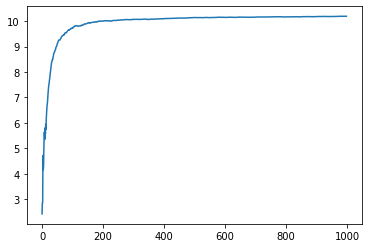

In [4]:
#plt.plot(_acts[-1000:])
plt.plot(_rwds)
plt.show()

In [30]:
true_rwds=np.array([1,2,3,4,5,6,7,8,9,10])*1
N=len(true_rwds)
def get_reward():
    noise=np.random.normal(0.0,1.0,N)
    return true_rwds+noise

q_val=np.zeros(N,dtype=np.float64)
n_val=np.ones(N,dtype=np.float64)
_esp=2
decay=0.99
_acts=[]
_rwds=[]
val=0
for i in range(1,1000):
        raw_rwd =get_reward()
        rwd=raw_rwd+_esp*np.sqrt(np.log(i)/n_val)
        act=np.argmax(rwd)
        n_val[act]+=1
        q_val[act]=q_val[act]+1/n_val[act]*(rwd[act]-q_val[act])
        val+=raw_rwd[act]
    
        #print(i,' ... ',raw_rwd,n_val,rwd)
        #_esp=_esp*decay
        _acts.append(act)
        _rwds.append(val/i)
_rwds=np.array(_rwds)
_acts=np.array(_acts)

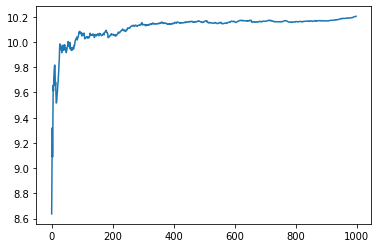

In [31]:
plt.plot(_rwds)
plt.show()

In [18]:
np.max(_rwds)

58.963295960997534

In [19]:
np.sqrt(np.log(i)/n_val)

array([2.14362307, 2.14362307, 2.14362307, 2.14362307, 2.14362307,
       2.14362307, 2.14362307, 2.14362307, 0.21436231, 2.14362307])

In [22]:
rwd,raw_rwd

(array([  1.94821282,   2.93543503,   4.15654222,   3.36768767,
          7.09170444,   7.44788297,   7.58017346,   9.36904907,
         11.54655963, 107.5370101 ]),
 array([0.94821282, 1.93543503, 3.15654222, 2.36768767, 6.09170444,
        6.44788297, 6.58017346, 8.36904907, 9.54655963, 9.5370101 ]))

In [11]:
n_val

array([ 1.,  1.,  1.,  2.,  2.,  3.,  5., 13., 25., 56.])